<a href="https://colab.research.google.com/github/krishnamenan007/Basic-Image-Processing-GUI/blob/main/Optimize_128_relu_mse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense
import keras
from keras.optimizers import *
from keras.initializers import *
from keras.layers import Dropout
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/smoking.csv')
# Preprocess the data
label_encoder = LabelEncoder()
df['tartar'] = label_encoder.fit_transform(df['tartar'])
df['gender'] = label_encoder.fit_transform(df['gender'])

feature_name = ["ID", "age", "height(cm)", "weight(kg)", "eyesight(left)", "eyesight(right)", "hearing(left)", "hearing(right)", "systolic", "fasting blood sugar", "Cholesterol", "triglyceride", "hemoglobin", "Urine protein", "serum creatinine", "AST", "ALT", "dental caries"]
dfX = df[feature_name]
dfY = df["smoking"]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(dfX)
dfX = scaler.transform(dfX)
dfX = pd.DataFrame(dfX, columns=feature_name)

X_train, X_test, y_train, y_test = train_test_split(dfX, dfY, test_size=0.20, random_state=1)
x_val = X_train[0:4000]
partial_x_train = X_train[4000:]
y_val = y_train[0:4000]
partial_y_train = y_train[4000:]


#Since the total number of columns in the dataframe is 18 , that's what we fill in input dimension
model = Sequential()
model.add(Dense(8, input_dim=18, activation='relu'))
model.add(Dense(8, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='RMSProp', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, batch_size =300, epochs =8, validation_data=(x_val, y_val))

Epoch 1/8
136/136 [==============================] - 4s 8ms/step - loss: 221.3884 - accuracy: 0.5269 - val_loss: 206.7773 - val_accuracy: 0.6230
Epoch 2/8
136/136 [==============================] - 1s 6ms/step - loss: 188.7617 - accuracy: 0.5306 - val_loss: 176.3362 - val_accuracy: 0.3767
Epoch 3/8
136/136 [==============================] - 1s 6ms/step - loss: 165.9451 - accuracy: 0.5342 - val_loss: 8.0047 - val_accuracy: 0.4805
Epoch 4/8
136/136 [==============================] - 1s 7ms/step - loss: 144.8477 - accuracy: 0.5367 - val_loss: 40.1027 - val_accuracy: 0.3865
Epoch 5/8
136/136 [==============================] - 1s 6ms/step - loss: 136.7699 - accuracy: 0.5371 - val_loss: 140.9666 - val_accuracy: 0.6248
Epoch 6/8
136/136 [==============================] - 1s 7ms/step - loss: 126.0607 - accuracy: 0.5419 - val_loss: 114.4172 - val_accuracy: 0.6242
Epoch 7/8
136/136 [==============================] - 1s 6ms/step - loss: 115.3448 - accuracy: 0.5401 - val_loss: 29.3412 - val_accura

In [ ]:

#Making predictions and evaluating the model
score, acc = model.evaluate(X_train, y_train,verbose=0)
print('Train accuracy:', acc)

y_pred = model.predict(X_test,verbose=0)

# If your model predicts probabilities, you may need to convert them to class labels
# For example, if you have a binary classification problem
y_pred = (y_pred > 0.5).astype(int)
from sklearn.metrics import precision_score

# Assuming you have the true labels in y_true and the predicted labels in y_pred
precision = precision_score(y_test, y_pred)
from sklearn.metrics import recall_score

# Assuming you have the true labels in y_true and the predicted labels in y_pred
recall = recall_score(y_test, y_pred)

print("Recall:", recall)
print("Precision:", precision)

score, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', acc)

Train accuracy: 0.7066415548324585
Recall: 0.6925511197663097
Precision: 0.586718911115694
Test accuracy: 0.706706166267395


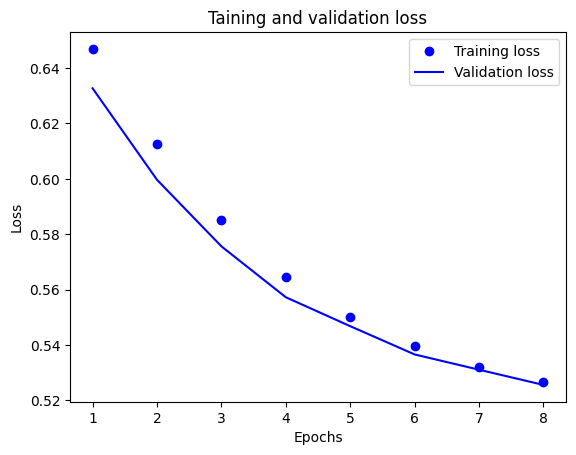

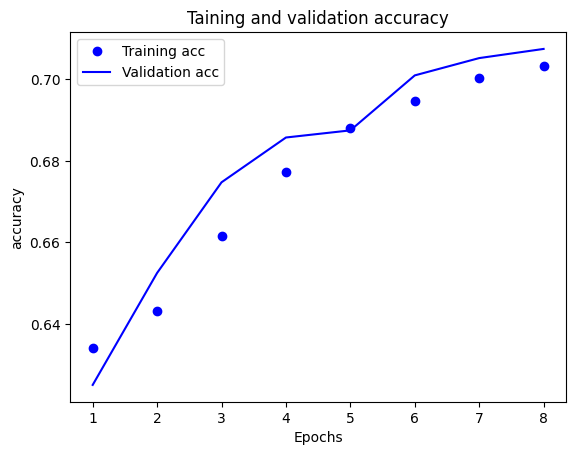

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Taining and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Taining and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()